# DooDooJump - Project Notes

A game similar to Doodle Jump with additional mechanics to challenge players.

## Game Overview

**Core Mechanics:**
- Player jumping and moving left/right using arrow keys
- Traverse up the level
- Avoid obstacles and enemy platforms

**Features:**
- Moving platforms
- Disappearing platforms
- Enemy platforms
- Rising killzone
- Speed increases with height
- Difficulty selection affects platform ratios

## Hypothesis

**Research Question:** How does game speed affect player survival time?

**Hypothesis:** If speed is increased, the player will die sooner than when it is slower.

**Example:**
- Speed = 100 → Player survives ~60 seconds
- Speed = 200 → Player survives ~30 seconds

**Conclusion:** Survivability is inversely related to game speed

## Development Notes

Add your development notes, observations, and data analysis here...

## Data Analysis

Use the cells below to analyze your player data from `player_data.csv`

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load player data
df = pd.read_csv('DooDooJump/player_data.csv')
print("Dataset Overview:")
print(f"Total records: {len(df)}")
print(f"\nFirst few rows:")
df.head(10)

Dataset Overview:
Total records: 37

First few rows:


,PlayerID,SpeedMultiplier,TimeAlive,Timestamp
0,PDLAGLCG8,1.0,22.39,2026-01-12T16:30:57
1,PQFR9JFT6,1.0,1.96,2026-01-12T16:30:59
2,P30OZTH50,5.0,17.67,2026-01-12T16:31:16
3,PZRJLI3T0,1.0,127.23,2026-01-12T16:33:23
4,PHGRHCJ1Z,5.0,156.35,2026-01-12T16:36:00
5,PRPZPIO5W,1.0,9.17,2026-01-12T16:36:09
6,PKEXDSGI3,5.0,19.59,2026-01-12T16:43:38
7,PXPL82K0E,1.0,11.64,2026-01-12T16:43:50
8,PLIVC8CKV,5.0,3.76,2026-01-12T16:43:54
9,PZVE0RDBB,5.0,2.77,2026-01-12T16:43:56


In [2]:
# Descriptive Statistics by Speed Multiplier
print("Summary Statistics by Speed Multiplier:")
print("="*60)
summary = df.groupby('SpeedMultiplier')['TimeAlive'].describe()
print(summary)
print("\n")
print("Mean Survival Time by Speed:")
mean_times = df.groupby('SpeedMultiplier')['TimeAlive'].mean().sort_index()
for speed, time in mean_times.items():
    print(f"  Speed {speed}: {time:.2f} seconds")

Summary Statistics by Speed Multiplier:
                 count      mean         std   min      25%     50%     75%  \
SpeedMultiplier                                                               
1.0               10.0  65.85400  121.015712  1.96  11.7375  21.565  31.100   
5.0               27.0  15.10963   29.561283  0.53   3.5200   6.470  15.875   

                    max  
SpeedMultiplier          
1.0              394.90  
5.0              156.35  


Mean Survival Time by Speed:
  Speed 1.0: 65.85 seconds
  Speed 5.0: 15.11 seconds


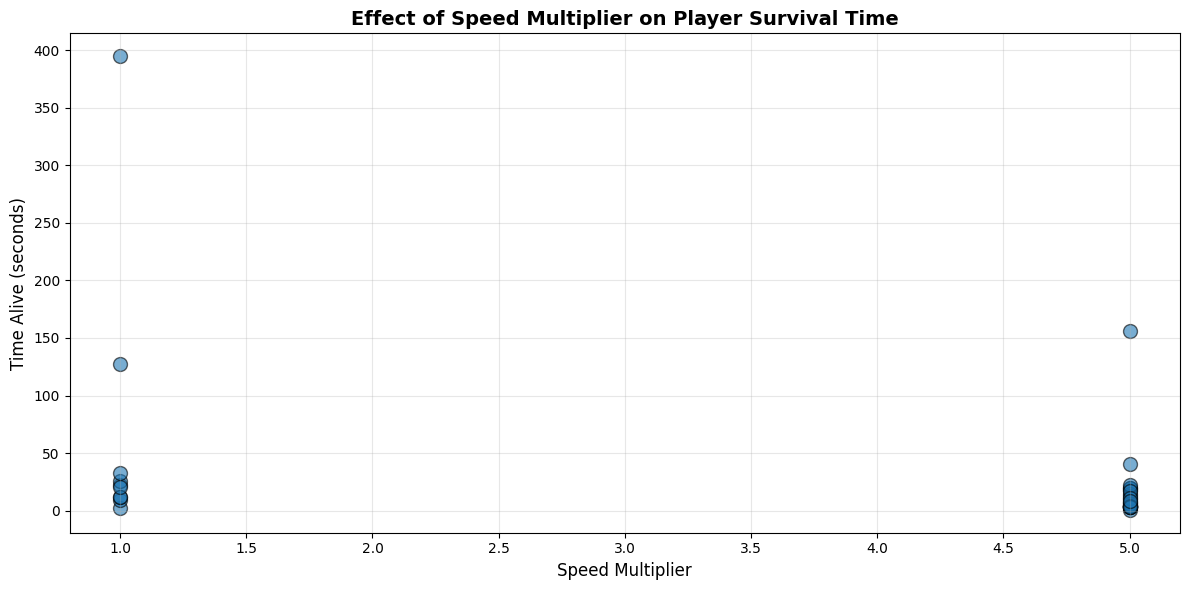


Correlation between Speed and Survival Time: -0.329


In [3]:
# Visualization 1: Scatter Plot - Speed vs Survival Time
plt.figure(figsize=(12, 6))
plt.scatter(df['SpeedMultiplier'], df['TimeAlive'], alpha=0.6, s=100, edgecolors='black')
plt.xlabel('Speed Multiplier', fontsize=12)
plt.ylabel('Time Alive (seconds)', fontsize=12)
plt.title('Effect of Speed Multiplier on Player Survival Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['SpeedMultiplier'].corr(df['TimeAlive'])
print(f"\nCorrelation between Speed and Survival Time: {correlation:.3f}")

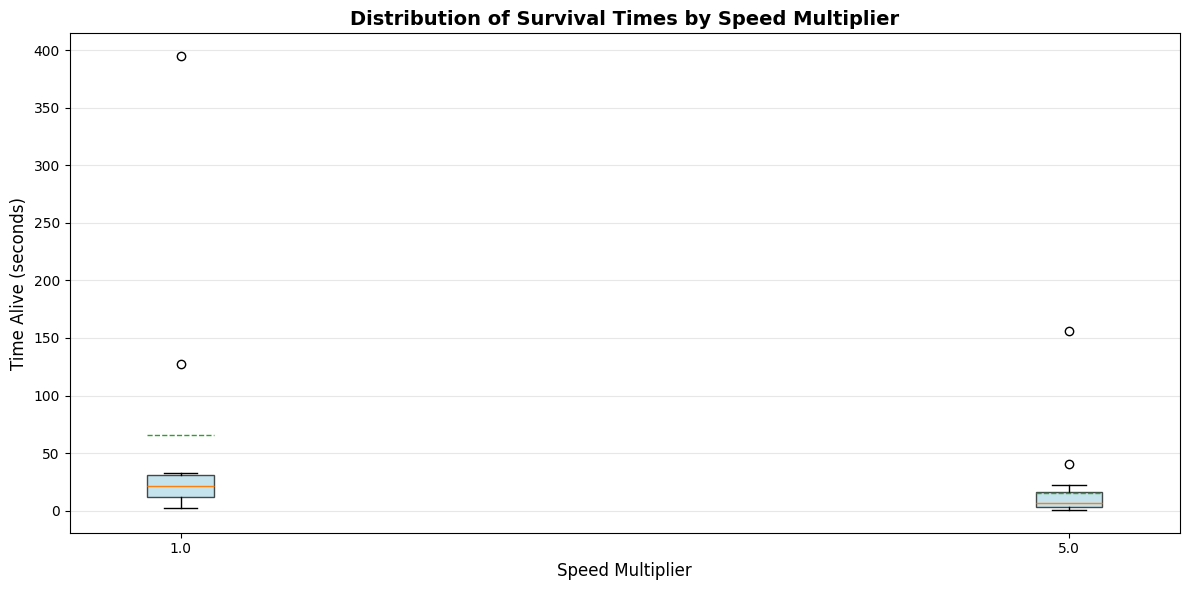

In [4]:
# Visualization 2: Box Plot - Distribution of Survival Times by Speed
plt.figure(figsize=(12, 6))
speed_groups = df.groupby('SpeedMultiplier')['TimeAlive'].apply(list)
positions = sorted(df['SpeedMultiplier'].unique())
data_to_plot = [df[df['SpeedMultiplier'] == speed]['TimeAlive'].values for speed in positions]

bp = plt.boxplot(data_to_plot, positions=positions, widths=0.3, patch_artist=True,
                 showmeans=True, meanline=True)

# Color the boxes
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

plt.xlabel('Speed Multiplier', fontsize=12)
plt.ylabel('Time Alive (seconds)', fontsize=12)
plt.title('Distribution of Survival Times by Speed Multiplier', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

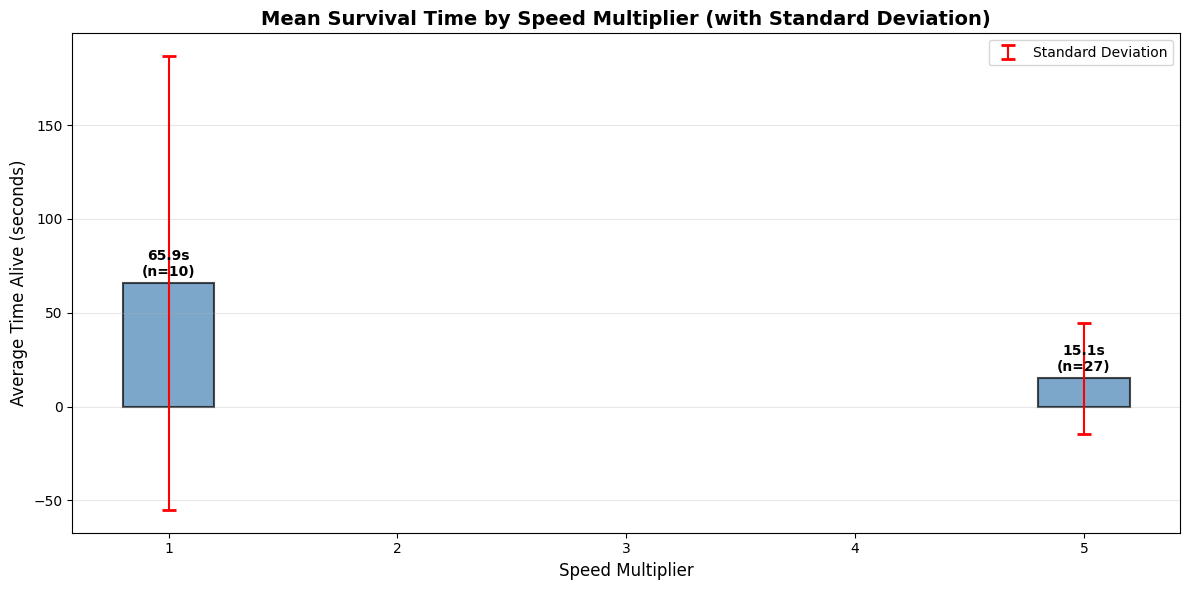

In [5]:
# Visualization 3: Bar Chart - Mean Survival Time with Error Bars
plt.figure(figsize=(12, 6))
summary_stats = df.groupby('SpeedMultiplier')['TimeAlive'].agg(['mean', 'std', 'count'])
speeds = summary_stats.index
means = summary_stats['mean']
stds = summary_stats['std']

bars = plt.bar(speeds, means, width=0.4, alpha=0.7, color='steelblue', edgecolor='black', linewidth=1.5)
plt.errorbar(speeds, means, yerr=stds, fmt='none', color='red', capsize=5, capthick=2, label='Standard Deviation')

# Add value labels on bars
for i, (speed, mean, count) in enumerate(zip(speeds, means, summary_stats['count'])):
    plt.text(speed, mean + 2, f'{mean:.1f}s\n(n={count})', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Speed Multiplier', fontsize=12)
plt.ylabel('Average Time Alive (seconds)', fontsize=12)
plt.title('Mean Survival Time by Speed Multiplier (with Standard Deviation)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [6]:
# Statistical Analysis: Test if speed significantly affects survival time
print("Statistical Significance Testing")
print("="*60)

# Get data for different speed groups
speed_1 = df[df['SpeedMultiplier'] == 1.0]['TimeAlive']
speed_2 = df[df['SpeedMultiplier'] == 2.0]['TimeAlive']
speed_5 = df[df['SpeedMultiplier'] == 5.0]['TimeAlive']

# Perform t-tests between groups
if len(speed_1) > 0 and len(speed_2) > 0:
    t_stat_1v2, p_value_1v2 = stats.ttest_ind(speed_1, speed_2)
    print(f"\nSpeed 1.0 vs Speed 2.0:")
    print(f"  t-statistic: {t_stat_1v2:.3f}")
    print(f"  p-value: {p_value_1v2:.4f}")
    print(f"  Significant? {'Yes (p < 0.05)' if p_value_1v2 < 0.05 else 'No (p >= 0.05)'}")

if len(speed_1) > 0 and len(speed_5) > 0:
    t_stat_1v5, p_value_1v5 = stats.ttest_ind(speed_1, speed_5)
    print(f"\nSpeed 1.0 vs Speed 5.0:")
    print(f"  t-statistic: {t_stat_1v5:.3f}")
    print(f"  p-value: {p_value_1v5:.4f}")
    print(f"  Significant? {'Yes (p < 0.05)' if p_value_1v5 < 0.05 else 'No (p >= 0.05)'}")

if len(speed_2) > 0 and len(speed_5) > 0:
    t_stat_2v5, p_value_2v5 = stats.ttest_ind(speed_2, speed_5)
    print(f"\nSpeed 2.0 vs Speed 5.0:")
    print(f"  t-statistic: {t_stat_2v5:.3f}")
    print(f"  p-value: {p_value_2v5:.4f}")
    print(f"  Significant? {'Yes (p < 0.05)' if p_value_2v5 < 0.05 else 'No (p >= 0.05)'}")

Statistical Significance Testing

Speed 1.0 vs Speed 5.0:
  t-statistic: 2.063
  p-value: 0.0466
  Significant? Yes (p < 0.05)


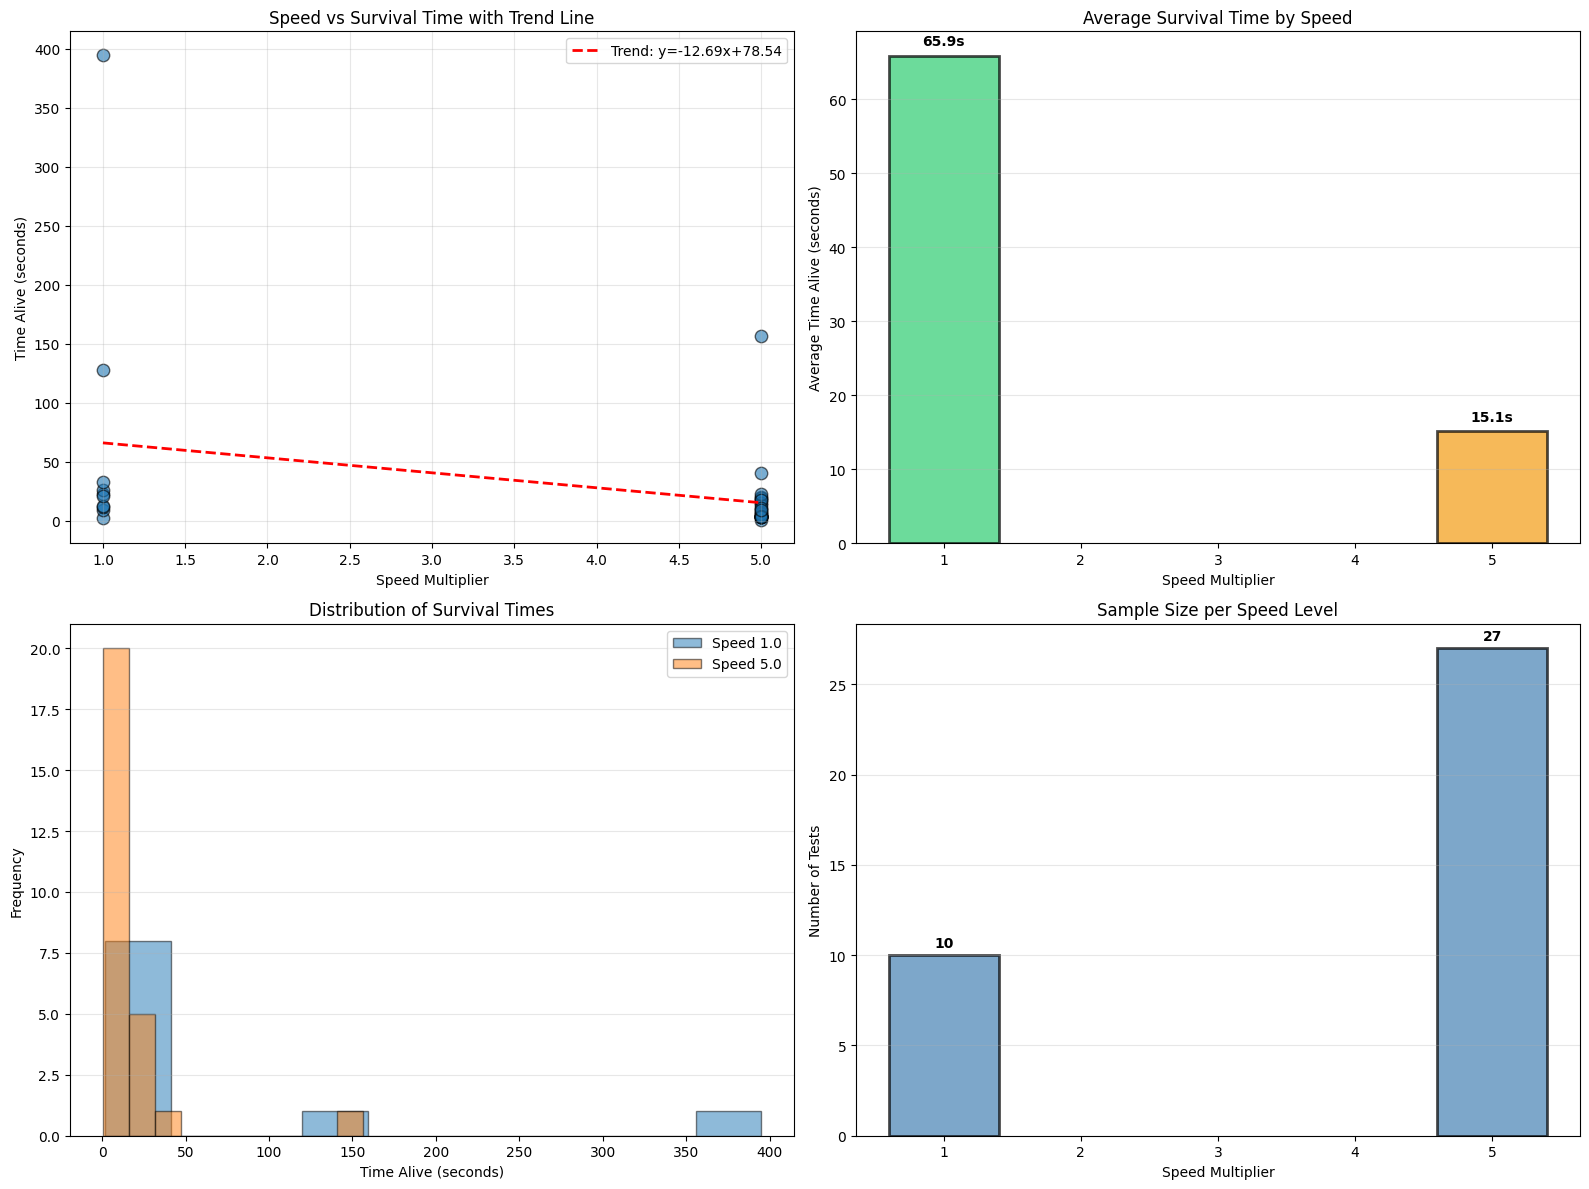


HYPOTHESIS TEST RESULTS
Correlation: -0.329
Interpretation: NEGATIVE correlation - Higher speed = Lower survival


In [7]:
# Visualization 4: Combined Dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Scatter with trend line
ax1 = axes[0, 0]
ax1.scatter(df['SpeedMultiplier'], df['TimeAlive'], alpha=0.6, s=80, edgecolors='black')
z = np.polyfit(df['SpeedMultiplier'], df['TimeAlive'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['SpeedMultiplier'].min(), df['SpeedMultiplier'].max(), 100)
ax1.plot(x_line, p(x_line), "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
ax1.set_xlabel('Speed Multiplier')
ax1.set_ylabel('Time Alive (seconds)')
ax1.set_title('Speed vs Survival Time with Trend Line')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Bar chart of means
ax2 = axes[0, 1]
summary_stats = df.groupby('SpeedMultiplier')['TimeAlive'].mean()
colors = ['#2ecc71', '#f39c12', '#e74c3c']
bars = ax2.bar(summary_stats.index, summary_stats.values, color=colors[:len(summary_stats)], 
               alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_xlabel('Speed Multiplier')
ax2.set_ylabel('Average Time Alive (seconds)')
ax2.set_title('Average Survival Time by Speed')
ax2.grid(True, alpha=0.3, axis='y')
for i, (speed, mean) in enumerate(summary_stats.items()):
    ax2.text(speed, mean + 1, f'{mean:.1f}s', ha='center', va='bottom', fontweight='bold')

# Plot 3: Histogram of all times
ax3 = axes[1, 0]
for speed in sorted(df['SpeedMultiplier'].unique()):
    data = df[df['SpeedMultiplier'] == speed]['TimeAlive']
    ax3.hist(data, alpha=0.5, label=f'Speed {speed}', bins=10, edgecolor='black')
ax3.set_xlabel('Time Alive (seconds)')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Survival Times')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Count of tests per speed
ax4 = axes[1, 1]
counts = df['SpeedMultiplier'].value_counts().sort_index()
ax4.bar(counts.index, counts.values, color='steelblue', alpha=0.7, edgecolor='black', linewidth=2)
ax4.set_xlabel('Speed Multiplier')
ax4.set_ylabel('Number of Tests')
ax4.set_title('Sample Size per Speed Level')
ax4.grid(True, alpha=0.3, axis='y')
for speed, count in counts.items():
    ax4.text(speed, count + 0.3, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("HYPOTHESIS TEST RESULTS")
print("="*60)
print(f"Correlation: {correlation:.3f}")
print(f"Interpretation: {'NEGATIVE correlation - Higher speed = Lower survival' if correlation < 0 else 'POSITIVE correlation - Higher speed = Higher survival'}")
print("="*60)